# 新一轮空值填充和模型训练
## 1 数据填充

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   # 忽略matplot的警告
warnings.simplefilter('ignore')     # 忽略sklearn的警告

In [2]:
train = pd.read_csv("./data/data.csv")

In [3]:
train.shape

(1460, 81)

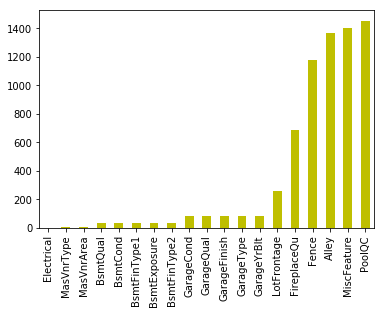

In [4]:
# 统计缺失值
x = train.isnull().sum()
x[x>0].sort_values().plot.bar(color='y')

- 柱状图越高，代表对应特征缺失值得数目越多

In [5]:
x[x>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

- 写一个函数，获取当前的空值特征情况

In [6]:
# 做一个get空的函数
def getnullcount():
    x = train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


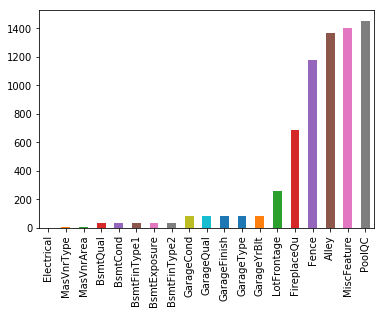

In [7]:
getnullcount()

### 1.1 LotFrontage的填充
- LotFrontage：临街面; 临海或临路部分的土地; 临街地界; 正面宽度; 屋向; 前方; 正面; 临街地。
- 填充的思路
    - （1）思路一：填不同的Neighborhood的均值和中位数
    - （2）思路二：通过LotArea进行填充，分析Lotfrontage 与 LotArea相关性

In [8]:
train['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

#### 1.1.1 填不同的Neighborhood的均值和中位数
- 这里只分析，并不真正填充。

In [9]:
import seaborn as sns

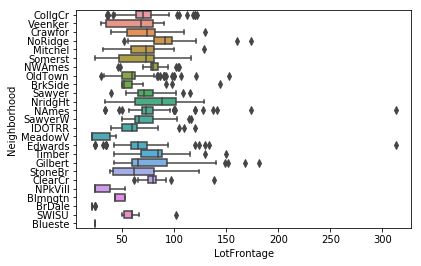

In [10]:
# 用箱线图看'LotFrontage'与'Neighborhood'的关系
sns.boxplot('LotFrontage', 'Neighborhood', data=train)

In [11]:
# 按Neighborhood的种类分组，各组的中位数和均值如下：
neighborhood_group=train.groupby("Neighborhood")
lot_medians=neighborhood_group["LotFrontage"].median()
lot_mean=neighborhood_group["LotFrontage"].mean()

In [12]:
lot_medians

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [13]:
lot_mean

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [14]:
# 查看LotFrontage是空值的行的Neighborhood的值
train[train["LotFrontage"].isnull()]["Neighborhood"]

7        NWAmes
12       Sawyer
14        NAmes
16        NAmes
24       Sawyer
31       Sawyer
42      SawyerW
43      CollgCr
50      Gilbert
64      CollgCr
66        NAmes
76        NAmes
84      Gilbert
95      Gilbert
100      NWAmes
104      IDOTRR
111     Gilbert
113     Crawfor
116      Sawyer
120     ClearCr
126     NPkVill
131     Gilbert
133      Timber
136       NAmes
147     Gilbert
149     BrkSide
152      NWAmes
153     ClearCr
160     Veenker
166     ClearCr
         ...   
1300    Gilbert
1301    Crawfor
1309    SawyerW
1312    NoRidge
1318    CollgCr
1321    BrkSide
1342    CollgCr
1346     NWAmes
1348    SawyerW
1354    CollgCr
1356      NAmes
1357      NAmes
1358    Somerst
1362      NAmes
1365    Somerst
1368    CollgCr
1373    NoRidge
1381      NAmes
1383     Sawyer
1396     Timber
1407    Mitchel
1417    NoRidge
1419    Crawfor
1423    Edwards
1424      NAmes
1429     NWAmes
1431    NPkVill
1441    CollgCr
1443    BrkSide
1446    Mitchel
Name: Neighborhood, Leng

- 就此打住，不做填充了。

#### 1.1.2 通过LotArea进行填充

In [15]:
# 分析LotFrontage与LotArea相关性
train['LotFrontage'].corr(train["LotArea"])

0.42609501877180816

In [16]:
# 可见相关性不高，这是他们的度量衡不一样 area是平方后的数据
train['LotFrontage'].corr(np.sqrt(train["LotArea"]))

0.6020022167939364

In [17]:
# 相关性比较大，可添加一列SqrtLotArea
train['SqrtLotArea']=np.sqrt(train["LotArea"])

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


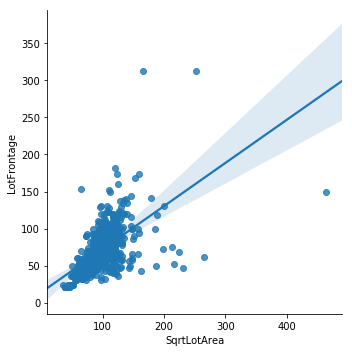

In [19]:
# 画出带回归的散点图，阴影置信区间
sns.lmplot('SqrtLotArea', 'LotFrontage', data=train)

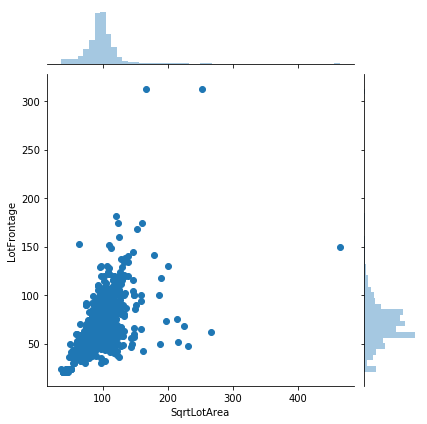

In [20]:
# 看一下两个的分布是否相近
sns.jointplot('SqrtLotArea', 'LotFrontage', data=train)

In [21]:
filter_LotFrontage = train['LotFrontage'].isnull()

In [22]:
train.LotFrontage[filter_LotFrontage] = 0.6*train.SqrtLotArea[filter_LotFrontage]

In [23]:
# 之前索引为7的LotFrontage是空值，现在看一下填充后的
train['LotFrontage'][7]

61.13525987513261

In [24]:
# 填充后的不是空值了
filter_LotFrontage.sum()

259

In [25]:
# 统计填充后的LotFrontage空值数量，可见没有空值了
train['LotFrontage'].isnull().sum()

0

### 1.2 MasVnrtype与MasVnrArea的填充
- MasVnrtype：Masonry veneer type，砖石镶板种类
       BrkCmn：Brick Common
       BrkFace：Brick Face
       CBlock：Cinder Block
       None：None
       Stone：Stone
- MasVnrArea：Masonry veneer area in square feet，砖石镶板面积

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


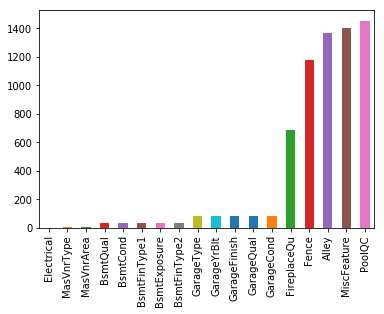

In [26]:
getnullcount()

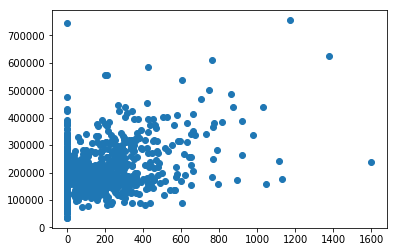

In [27]:
# 画MasVnrArea与SalePrice的散点图，看两者的相关性
plt.scatter(train["MasVnrArea"], train["SalePrice"])

In [28]:
train['MasVnrArea'].corr(train["SalePrice"])

0.47749304709571594

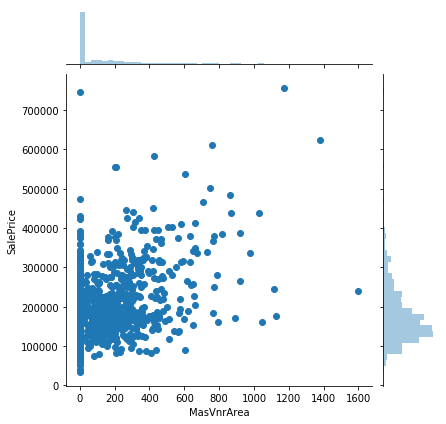

In [29]:
# 查看下分布情况
sns.jointplot(train["MasVnrArea"], train["SalePrice"])

- 看不出有啥相关性

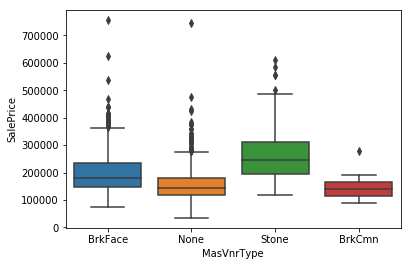

In [30]:
sns.boxplot("MasVnrType", "SalePrice", data=train)

In [31]:
# 统计MasVnrType各种类型的数量
train.groupby(["MasVnrType"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128


In [32]:
# 过滤
train[train.MasVnrType=='None'][["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


In [33]:
train[["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0
5,None,0.0
6,Stone,186.0
7,Stone,240.0
8,None,0.0
9,None,0.0


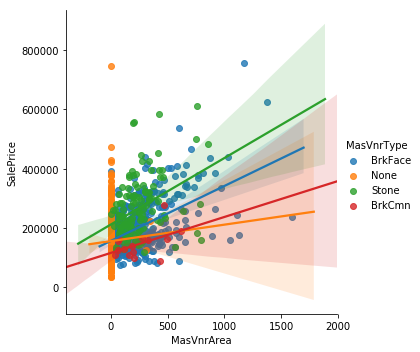

In [34]:
# 画出带回归的散点图，看下相关性，看斜率
sns.lmplot("MasVnrArea", "SalePrice", hue="MasVnrType", data=train)

In [35]:
# 可见相关性并不是很大，可以填充众数
filter_MasVnrArea = train['MasVnrArea'].isnull()   # 好像全部都是不是空啊

In [36]:
train.MasVnrArea[filter_MasVnrArea] = 0.0

In [37]:
filter_MasVnrType = train["MasVnrType"].isnull()
train.MasVnrType[filter_MasVnrType] = 'None'

- 后续在EDA的特征工程中，可以使用如下填充方法：分类进行预测MasVnrType,使用回归来回归MasVnrArea

In [38]:
train['MasVnrArea'].isnull().sum()

0

In [39]:
train["MasVnrType"].isnull().sum()

0

### 1.3 Electrical的填充
- Electrical：Electrical system，电气系统。
    - SBrkr：Standard Circuit Breakers & Romex
    - FuseA：Fuse Box over 60 AMP and all Romex wiring (Average)	
    - FuseF：60 AMP Fuse Box and mostly Romex wiring (Fair)
    - FuseP：60 AMP Fuse Box and mostly knob & tube wiring (poor)
    - Mix：Mixed

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


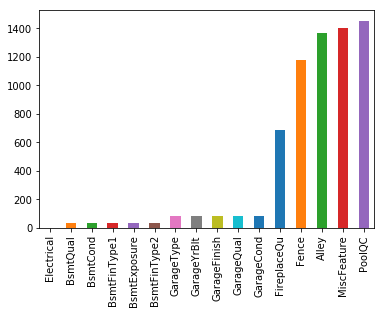

In [40]:
getnullcount()

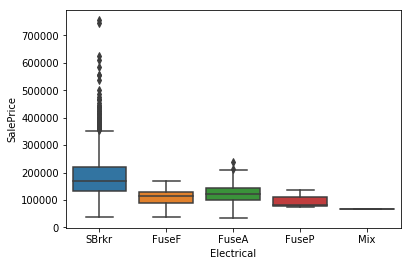

In [41]:
# 查看相关性
sns.boxplot("Electrical", "SalePrice", data=train)

In [42]:
# 分组统计下
train.groupby(["Electrical"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,12,94,94,94,...,0,23,2,94,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,4,27,27,27,...,0,2,0,27,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,0,0,0,3,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,73,1334,1334,1334,...,7,256,52,1334,1334,1334,1334,1334,1334,1334


In [43]:
# 直接填充众数
filter_Electrical = train["Electrical"].isnull()
train["Electrical"][filter_Electrical] = "SBrkr"

In [44]:
train["Electrical"].isnull().sum()

0

### 1.4 Alley(小巷子)的填充
- Alley: Type of alley access，胡同通道的类型。
    - Grvl：Gravel
    - Pave：Paved
    - NA ：No alley access 没有小巷
- EDA后半段考虑删掉
- 80%以上为空

In [45]:
train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

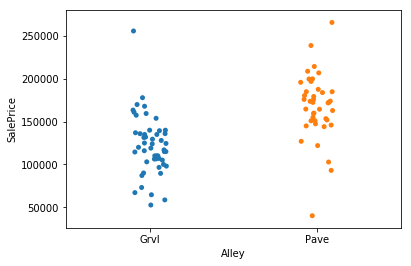

In [46]:
sns.stripplot("Alley", "SalePrice", data=train)

In [47]:
train['Alley']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
1430     NaN
1431     NaN
1432    Grvl
1433     NaN
1434     NaN
1435     NaN
1436     NaN
1437     NaN
1438     NaN
1439     NaN
1440     NaN
1441     NaN
1442     NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
1447     NaN
1448     NaN
1449     NaN
1450     NaN
1451     NaN
1452     NaN
1453     NaN
1454    Pave
1455     NaN
1456     NaN
1457     NaN
1458     NaN
1459     NaN
Name: Alley, Length: 1460, dtype: object

In [48]:
# 填充None
train["Alley"] = train["Alley"].fillna("None")

In [49]:
train["Alley"].isnull().sum()

0

In [50]:
len(train.columns)

82

### 1.5 BaseMent群填充
- TotalBsmtSF是一个完整的关于BaseMent的列，可以拿出来与SalePrice进行相关性分析

- BsmtQual: Evaluates the height of the basement，地下室的高度。
    - Ex: Excellent (100+ inches)
    - Gd: Good (90-99 inches)
    - TA: Typical (80-89 inches)
    - Fa: Fair (70-79 inches)
    - Po: Poor (<70 inches
    - NA: No Basement
       
- BsmtCond: Evaluates the general condition of the basement，地下室的一般状况。
    - Ex：Excellent
    - Gd：Good
    - TA：Typical - slight dampness allowed
    - Fa：Fair - dampness or some cracking or settling
    - Po：Poor - Severe cracking, settling, or wetness
    - NA：No Basement

- BsmtExposure: Refers to walkout or garden level walls,罢工或花园级地下室的墙壁,裸露的地下室部分。
    - Gd：Good Exposure
    - Av：Average Exposure (split levels or foyers typically score average or above)	
    - Mn：Mimimum Exposure
    - No：No Exposure
    - NA：No Basement

- BsmtFinType1: Rating of basement finished area，地下室成品面积质量。
    - GLQ：Good Living Quarters
    - ALQ：Average Living Quarters
    - BLQ：Below Average Living Quarters
    - Rec：Average Rec Room
    - LwQ：Low Quality
    - Unf：Unfinshed
    - NA：No Basement
       
- BsmtFinSF1: Type 1 finished square feet，1型方形脚。

- BsmtFinType2: Rating of basement finished area (if multiple types)，第二个完成区域的质量（如果存在）。
    - GLQ：Good Living Quarters
    - ALQ：Average Living Quarters
    - BLQ：Below Average Living Quarters
    - Rec：Average Rec Room
    - LwQ：Low Quality
    - Unf：Unfinshed
    - NA：No Basement

- BsmtFinSF2: Type 2 finished square feet，2型完成的平方英尺。

- BsmtUnfSF: Unfinished square feet of basement area，未完成的地下室面积。

- TotalBsmtSF: Total square feet of basement area，地下室面积的平方英尺。

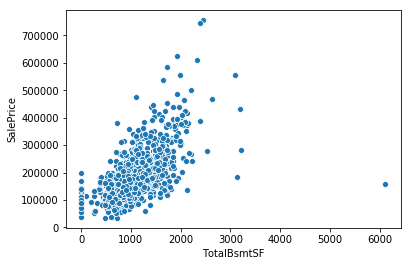

In [51]:
# 查看TotalBsmtSF与SalePrice的相关性
sns.scatterplot("TotalBsmtSF", "SalePrice", data=train)

In [52]:
train['TotalBsmtSF'].corr(train['SalePrice'])

0.6135805515591954

- 可见相关性比较高

In [53]:
basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

In [54]:
train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0


In [55]:
# 
train[train.BsmtCond=='NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea


In [56]:
# 离散的列填充None,数值的列的已经是0了。
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna("None")

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


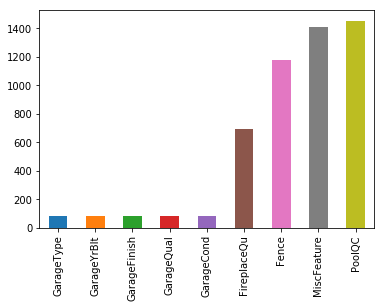

In [57]:
getnullcount()

### 1.6 FireplaceQu填充
- FireplaceQu: Fireplace quality， 壁炉质量。
    - Ex：Excellent - Exceptional Masonry Fireplace
    - Gd：Good - Masonry Fireplace in main level
    - TA：Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    - Fa：Fair - Prefabricated Fireplace in basement
    - Po：Poor - Ben Franklin Stove
    - NA：No Fireplace

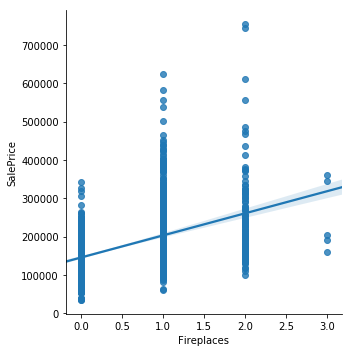

In [58]:
sns.lmplot("Fireplaces", "SalePrice", data=train)

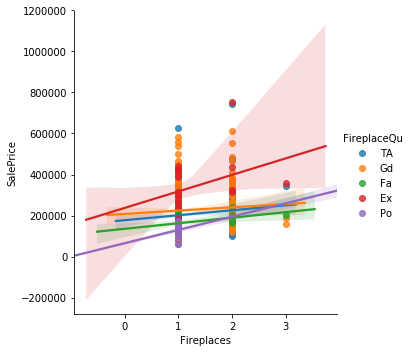

In [59]:
sns.lmplot("Fireplaces", "SalePrice", data=train, hue="FireplaceQu")

In [60]:
# 相关性不大，直接填充None
train["FireplaceQu"]=train["FireplaceQu"].fillna("None")

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


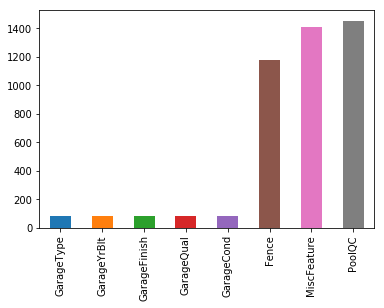

In [61]:
getnullcount()

### 1.7 Garage群的填充

- GarageType: Garage location，车库位置。
    - 2Types: More than one type of garage
    - Attchd: Attached to home
    - Basment: Basement Garage
    - BuiltIn: Built-In (Garage part of house - typically has room above garage)
    - CarPort: Car Port
    - Detchd: Detached from home
    - NA: No Garage

- GarageYrBlt: Year garage was built，年建车库。

- GarageFinish: Interior finish of the garage，车库内部装修。
    - Fin: Finished
    - RFn: Rough Finished	
    - Unf: Unfinished
    - NA: No Garage

- GarageCars: Size of garage in car capacity，车库的车库容量。

- GarageArea: Size of garage in square feet，平方英尺车库大小。

- GarageQual: Garage quality，车库质量。
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage

- GarageCond: Garage condition，车库条件。
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage


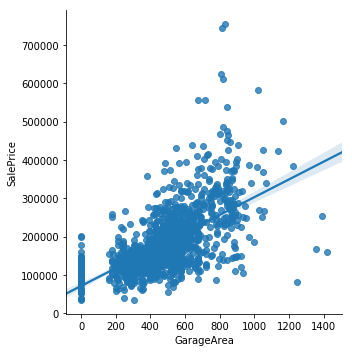

In [62]:
sns.lmplot("GarageArea", "SalePrice", data=train)

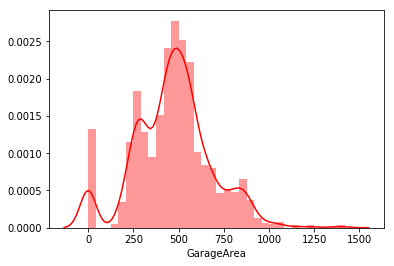

In [63]:
sns.distplot(train["GarageArea"], color='r', kde=True)

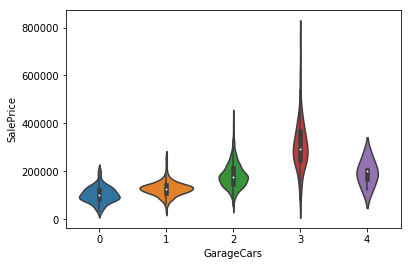

In [64]:
sns.violinplot(train["GarageCars"], train["SalePrice"])

In [65]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [66]:
train[garage_cols][train['GarageType'].isnull()]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [67]:
for col in garage_cols:
    if train[col].dtype == np.object:
        train[col]=train[col].fillna("None")
    else:
        train[col]=train[col].fillna(0)

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


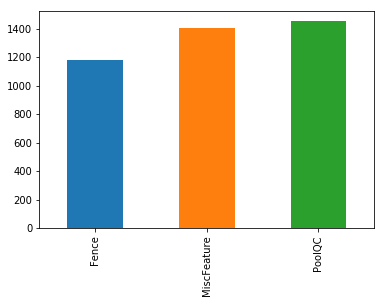

In [68]:
getnullcount()

### 1.8 PoolQC的填充
- Pool quality,  游泳池质量
    - Ex：Excellent
    - Gd：Good
    - TA：Average/Typical
    - Fa：Fair
    - NA：No Pool

In [69]:
train.filter(like="Pool", axis=1)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


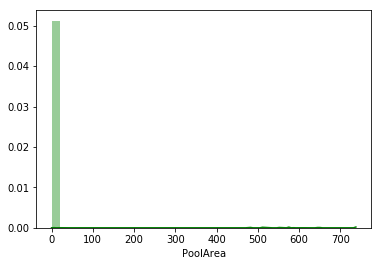

In [70]:
sns.distplot(train["PoolArea"],color="g", kde=True)

In [71]:
train['PoolQC'].isnull().sum()

1453

In [72]:
# 基本都是空值
train.PoolQC = train.PoolQC.fillna("None")

Fence          1179
MiscFeature    1406
dtype: int64


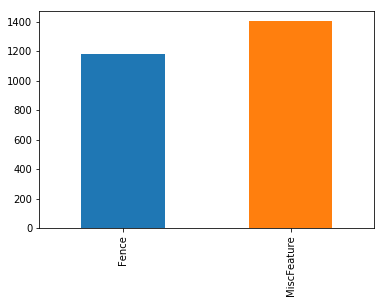

In [73]:
getnullcount()

### 1.9 Fence的填充
- Fence: Fence quality，栅栏质量。
    - GdPrv：Good Privacy
    - MnPrv：Minimum Privacy
    - GdWo：Good Wood
    - MnWw：Minimum Wood/Wire
    - NA：No Fence

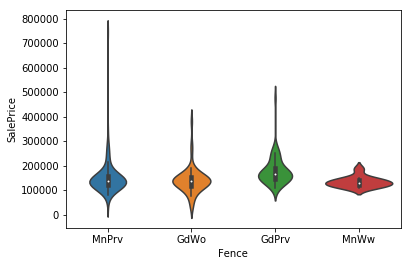

In [74]:
sns.violinplot(train["Fence"], train["SalePrice"])

In [75]:
# 因为总共有5个类型，然而可以统计出来的类型一共只有4类，因此可以断定最后一类NA用空值代替
train["Fence"]=train["Fence"].fillna("None")

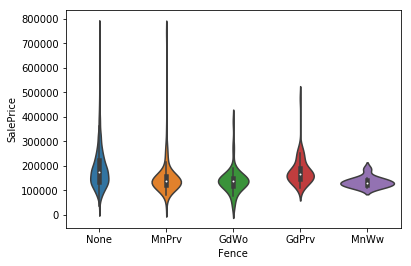

In [76]:
# 回看填充后的数据分布
sns.violinplot(train["Fence"], train["SalePrice"])

### 1.10 MiscFeature的填充
- Miscellaneous feature not covered in other categories，其余特征。
- Elev：Elevator
- Gar2：2nd Garage (if not described in garage section)
- Othr：Other
- Shed：Shed (over 100 SF)
- TenC：Tennis Court
- NA：None

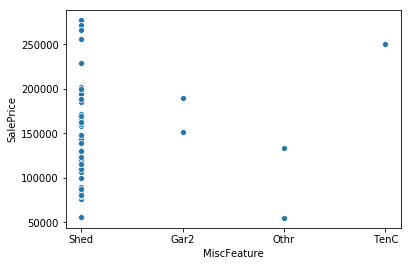

In [77]:
sns.scatterplot("MiscFeature", "SalePrice", data=train)

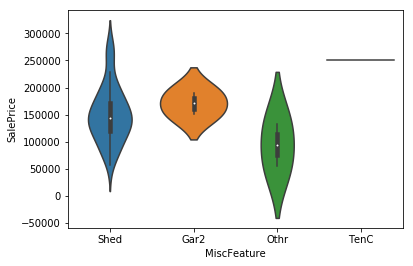

In [78]:
sns.violinplot(train["MiscFeature"], train["SalePrice"])

In [79]:
# 因为MiscFeature本来有5类，然而只统计出4类，因此可以断定第五类NA是空值
train["MiscFeature"]=train["MiscFeature"].fillna("None")

In [80]:
# getnullcount() # 没有数据了，所以报错。

In [81]:
train.shape

(1460, 82)

- 新一轮数据填充完毕。
- 保存数据。

In [82]:
train.to_csv('./data/train_1.csv')

## 2 模型训练部分
- 数据分析完成了，需要开始机器学习训练了。
- 需要考虑各种单独的模型的各自表现后，筛选出表现较好的模型，并进行集成学习。单独的模型包括：

- 1.线性回归类模型
    - 1.1 朴素线性回归
    - 1.2 基于L1的线性回归   
    - 1.3 基于L2的线性回归 
    - 1.4 ElasticNet（弹性网络）
    
- 2.树回归-CART
    - 2.1 CART
    - 2.2 RF
    - 2.3 AdaBoost
    - 2.4 GBDT--XGBoost--lightGBM
    
- 3.SVM类型
    - 3.1SVR
    
- 4.神经网络
    - 4.1FC神经网络

- 5.集成学习
    - 5.1 Stacking Ensemble

## 2.1 数据集的准备

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [84]:
new_train = pd.read_csv("./data/train_1.csv")
y = new_train["SalePrice"]
train1 = new_train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)

In [85]:
X.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [86]:
X['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [87]:
X =X.drop(['Unnamed: 0'], axis=1)

In [88]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 2.2 基础线性回归

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
lm = LinearRegression()

In [92]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
def benchmark(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    return rmse, logrmse

In [94]:
benchmark(lm)

RMSE: 24973.913406554628 
LOGRMSE: 0.1262780962215672


(24973.913406554628, 0.1262780962215672)

## 2.3 带规模化预处理的基础线性回归
- StandardScaler-处理成标准正态分布（难以改变数据的偏度）

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [96]:
lm_model = make_pipeline(RobustScaler(), LinearRegression())

In [97]:
lm_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [98]:
benchmark(lm_model)

RMSE: 24973.913406556017 
LOGRMSE: 0.12627809622156433


(24973.913406556017, 0.12627809622156433)

## 2.4 LassoRegression
### 2.4.1 原始Lasso

In [99]:
from sklearn.linear_model import Lasso

In [100]:
lasso_model = Lasso(alpha=1,random_state=123,max_iter=3000)

In [101]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
benchmark(lasso_model)

RMSE: 24784.837851375265 
LOGRMSE: 0.12580415715130425


(24784.837851375265, 0.12580415715130425)

### 2.4.2 pipeline Lasso

In [103]:
lasso_model_pipe = make_pipeline(RobustScaler(), Lasso(alpha=10, max_iter = 3000, random_state=123))

In [104]:
lasso_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [105]:
benchmark(lasso_model_pipe)

RMSE: 24713.133694963708 
LOGRMSE: 0.12177521894833487


(24713.133694963708, 0.12177521894833487)

### 2.4.3 Lasso找出最佳参数

In [106]:
from sklearn.model_selection import KFold

In [107]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=123)

In [114]:
from sklearn.linear_model import LassoCV
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning) 

In [115]:
l_alphas = np.logspace(-10, 2.8, 150)

In [116]:
def lasso_train_test(alpha):
    lasso_model =  make_pipeline(RobustScaler(), LassoCV(alphas=[alpha], cv=kfolds))
    lasso_model.fit(X_train, y_train)
    r = benchmark(lasso_model)
    return r[1]

In [117]:
scores = []
for k in l_alphas:
    scores.append(lasso_train_test(k))

RMSE: 24910.987078806716 
LOGRMSE: 0.12669462621586902
RMSE: 24910.98707920023 
LOGRMSE: 0.12669462621633493
RMSE: 24910.987079679802 
LOGRMSE: 0.12669462621690267
RMSE: 24910.987080264225 
LOGRMSE: 0.12669462621759447
RMSE: 24910.987080976556 
LOGRMSE: 0.12669462621843772
RMSE: 24910.987081844632 
LOGRMSE: 0.12669462621946534
RMSE: 24910.987082902575 
LOGRMSE: 0.12669462622071745
RMSE: 24910.987084191915 
LOGRMSE: 0.12669462622224392
RMSE: 24910.987085763267 
LOGRMSE: 0.12669462622410377
RMSE: 24910.987087678343 
LOGRMSE: 0.1266946262263707
RMSE: 24910.987090012288 
LOGRMSE: 0.12669462622913377
RMSE: 24910.98709285671 
LOGRMSE: 0.1266946262325008
RMSE: 24910.98709632331 
LOGRMSE: 0.12669462623660455
RMSE: 24910.987100548118 
LOGRMSE: 0.12669462624160543
RMSE: 24910.987105697033 
LOGRMSE: 0.1266946262477006
RMSE: 24910.987111972165 
LOGRMSE: 0.12669462625512892
RMSE: 24910.987119619764 
LOGRMSE: 0.12669462626418193
RMSE: 24910.98712894009 
LOGRMSE: 0.1266946262752148
RMSE: 24910.987140

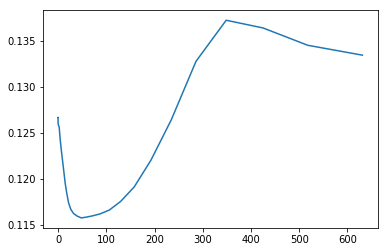

In [118]:
plt.plot(l_alphas, scores)

In [119]:
# 自动筛选
lasso_model2 = make_pipeline(RobustScaler(), LassoCV(
    alphas=l_alphas, cv=kfolds
)).fit(X_train, y_train)

In [120]:
benchmark(lasso_model2)

RMSE: 25431.11182950885 
LOGRMSE: 0.12203176481488642


(25431.11182950885, 0.12203176481488642)

In [121]:
lasso_model2.steps[1][1].alpha_

192.5589718453296

## 2.5 RidgeRegression
### 2.5.1 原始Ridge

In [122]:
from sklearn.linear_model import Ridge

In [123]:
ridge_model = Ridge(alpha=10, max_iter=3000, random_state=123)

In [124]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=123, solver='auto', tol=0.001)

In [125]:
benchmark(ridge_model)

RMSE: 25891.10989920008 
LOGRMSE: 0.13080677881966868


(25891.10989920008, 0.13080677881966868)

### 2.5.2 带预处理的Ridge

In [126]:
ridge_model_pipe = make_pipeline(RobustScaler(), Ridge(alpha=100, max_iter=3000, random_state=123))

In [127]:
ridge_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=123, solver='auto', tol=0.001))])

In [128]:
benchmark(ridge_model_pipe)

RMSE: 26907.89401651116 
LOGRMSE: 0.12385966794851823


(26907.89401651116, 0.12385966794851823)

### 2.5.2 带CV的Ridge回归

In [130]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

In [131]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=123)

In [132]:
r_alphas = [0.01, 0.1, 1, 3, 5, 7, 10, 100]

In [133]:
ridge_model_cv = make_pipeline(RobustScaler(), RidgeCV(alphas=r_alphas, cv=kfolds))

In [134]:
ridge_model_cv.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 1.e+02]),
    cv=KFold(n_splits=10, random_state=123, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [135]:
benchmark(ridge_model_cv)

RMSE: 26907.89401651116 
LOGRMSE: 0.12385966794851823


(26907.89401651116, 0.12385966794851823)

### 2.5.3 画出alphas与log rmse的关系图
- 寻找最佳系数

In [136]:
r_alphas = [
    .0001, .0003, .0005, .0007, .0009, .01, .05, 0.1, 0.3, 1, 3, 5, 7, 10, 20, 30, 50, 70, 80
]

In [137]:
def ridge_train_test(alpha):
    m=make_pipeline(RobustScaler(),RidgeCV(alphas=[alpha],cv=kfolds))
    m.fit(X_train,y_train)
    return benchmark(m)[1]

In [138]:
scores = []
for a in r_alphas:
    scores.append(ridge_train_test(a))

RMSE: 24973.969248875692 
LOGRMSE: 0.12627904574472076
RMSE: 24974.08081833782 
LOGRMSE: 0.1262809158007541
RMSE: 24974.192243004778 
LOGRMSE: 0.12628274791869917
RMSE: 24974.303534367467 
LOGRMSE: 0.12628454294720085
RMSE: 24974.414703849514 
LOGRMSE: 0.1262863017144013
RMSE: 24979.52813437779 
LOGRMSE: 0.12633870541444392
RMSE: 25012.204406895722 
LOGRMSE: 0.1264170991394374
RMSE: 25072.955925339604 
LOGRMSE: 0.1265856676424161
RMSE: 25328.50195034767 
LOGRMSE: 0.12762387547257212
RMSE: 25776.23152819278 
LOGRMSE: 0.12993386266803694
RMSE: 26017.00830435278 
LOGRMSE: 0.13133359554876903
RMSE: 26002.202070522937 
LOGRMSE: 0.1310427758353868
RMSE: 25955.051316659985 
LOGRMSE: 0.13050748908122028
RMSE: 25890.568567439008 
LOGRMSE: 0.12971142906645255
RMSE: 25816.158578356997 
LOGRMSE: 0.1277569725395532
RMSE: 25873.84358516783 
LOGRMSE: 0.12652048146318884
RMSE: 26130.639014982953 
LOGRMSE: 0.1250639234007509
RMSE: 26440.645901425916 
LOGRMSE: 0.12430803900379384
RMSE: 26598.29289487177

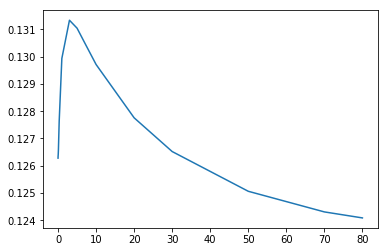

In [139]:
plt.plot(r_alphas, scores)

### 2.5.4 RidgeCV 自动筛选参数

In [140]:
# 开始点和结束点是10的幂，-10代表10的-10次方，2.8代表10的2.8次方。150代表150个点。
n_alphas = np.logspace(-10, 2.8, 150)

In [141]:
n_alphas

array([1.00000000e-10, 1.21872590e-10, 1.48529282e-10, 1.81016482e-10,
       2.20609475e-10, 2.68862481e-10, 3.27669668e-10, 3.99339511e-10,
       4.86685405e-10, 5.93136107e-10, 7.22870335e-10, 8.80980799e-10,
       1.07367412e-09, 1.30851445e-09, 1.59472045e-09, 1.94352711e-09,
       2.36862683e-09, 2.88670686e-09, 3.51810441e-09, 4.28760496e-09,
       5.22541521e-09, 6.36834885e-09, 7.76127168e-09, 9.45886280e-09,
       1.15277611e-08, 1.40491810e-08, 1.71221007e-08, 2.08671476e-08,
       2.54313332e-08, 3.09938244e-08, 3.77729765e-08, 4.60349047e-08,
       5.61039306e-08, 6.83753132e-08, 8.33307651e-08, 1.01557362e-07,
       1.23770587e-07, 1.50842420e-07, 1.83835563e-07, 2.24045162e-07,
       2.73049642e-07, 3.32772670e-07, 4.05558671e-07, 4.94264856e-07,
       6.02373381e-07, 7.34128040e-07, 8.94700855e-07, 1.09039510e-06,
       1.32889275e-06, 1.61955601e-06, 1.97379486e-06, 2.40551491e-06,
       2.93166332e-06, 3.57289402e-06, 4.35437848e-06, 5.30679382e-06,
      

In [142]:
auto_scores = []
for a in n_alphas:
    auto_scores.append(ridge_train_test(a))

RMSE: 24973.91602533041 
LOGRMSE: 0.1262774308516192
RMSE: 24973.81041602889 
LOGRMSE: 0.12627718433512103
RMSE: 24973.870045388507 
LOGRMSE: 0.1262772646254286
RMSE: 24973.86524084593 
LOGRMSE: 0.1262774545482905
RMSE: 24973.87094249474 
LOGRMSE: 0.12627766718648517
RMSE: 24973.876740162876 
LOGRMSE: 0.12627766216525044
RMSE: 24973.922122678545 
LOGRMSE: 0.12627785572533368
RMSE: 24973.886849065835 
LOGRMSE: 0.12627780448650908
RMSE: 24973.911954425905 
LOGRMSE: 0.12627791076746014
RMSE: 24973.898081196287 
LOGRMSE: 0.1262779204281474
RMSE: 24973.910289623404 
LOGRMSE: 0.12627794837180964
RMSE: 24973.911675107596 
LOGRMSE: 0.12627799016321228
RMSE: 24973.911112745842 
LOGRMSE: 0.12627800573400544
RMSE: 24973.90644634036 
LOGRMSE: 0.12627800626073155
RMSE: 24973.913374630178 
LOGRMSE: 0.1262780329674018
RMSE: 24973.910834908453 
LOGRMSE: 0.12627804936076664
RMSE: 24973.908616571633 
LOGRMSE: 0.12627805118798366
RMSE: 24973.911854269125 
LOGRMSE: 0.12627806059063718
RMSE: 24973.90964644

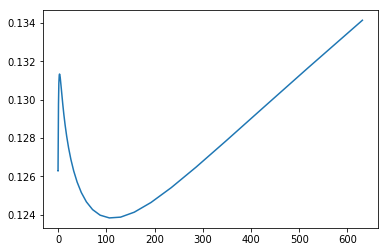

In [143]:
plt.plot(n_alphas, auto_scores)

- 上图可看出最佳的alpha在100多一点
- 接下来我们用RidgeCV自动筛选出最优的alpha

In [144]:
ridge_model_auto = make_pipeline(RobustScaler(), RidgeCV(
    alphas = n_alphas, cv=kfolds
)).fit(X_train, y_train)

In [145]:
benchmark(ridge_model_auto)

RMSE: 25983.546991372656 
LOGRMSE: 0.12570253861398756


(25983.546991372656, 0.12570253861398756)

In [146]:
# 最佳alpha
ridge_model_auto.steps[1][1].alpha_

39.56538865832277

### 思考： 为什么不是100多呢？

## 2.6 ElasticNet 

In [147]:
from sklearn.linear_model import ElasticNetCV

In [148]:
e_l1ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1]

In [149]:
e_alphas = n_alphas

In [150]:
def elastic_train_test(alpha, l1ratio):
    e_model = make_pipeline(RobustScaler(), ElasticNetCV(alphas=[alpha], l1_ratio=[l1ratio]))
    e_model.fit(X_train, y_train)
    r = benchmark1(e_model)
    return r[1]

In [152]:
elastic_model = make_pipeline(RobustScaler(), ElasticNetCV(alphas=e_alphas, l1_ratio=e_l1ratio)).fit(X_train, y_train)

In [153]:
benchmark(elastic_model)

RMSE: 25431.11182950885 
LOGRMSE: 0.12203176481488642


(25431.11182950885, 0.12203176481488642)

In [154]:
elastic_model.steps[1][1].alpha_

192.5589718453296

In [155]:
elastic_model.steps[1][1].l1_ratio_

1.0